# Final Assessment – Introduction to Data Science with Python
# Name: Bredillot Alexandre
# Student Code: 110138

In [37]:
#Import all the librairies we'll be using in the notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats as st
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import r2_score
from scipy.stats import norm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox

In [38]:
#Charges the csv data
dfs = {}
for year in range(2015, 2020):
    dfs[year] = pd.read_csv(f"World_Happiness_Report_{year}.csv")

## ========================
## 🧠 PART A – Understanding the Sources of Happiness
## ========================


### DSQ1
### Variable types

| Variable Name                   | Description                                                      | Type          |
|--------------------------------|------------------------------------------------------------------|---------------|
| `Overall rank`/`Hapiness Rank`                 | Country's position based on happiness score                      | Ordinal       |
| `Country or region`           | Name of the country or region                                    | Categorical   |
| `Score`/`Hapiness Score`                        | Happiness score (subjective well-being)                          | Continuous    |
| `GDP per capita`              | Contribution of GDP per capita to happiness (log-transformed)    | Continuous    |
| `Social support`              | Availability of social support (survey-based)                    | Continuous    |
| `Healthy life expectancy`     | Expected healthy years of life                                   | Continuous    |
| `Freedom to make life choices`| Perceived freedom in making life decisions                       | Continuous    |
| `Generosity`                  | Willingness to help others (e.g., donations)                     | Continuous    |
| `Perceptions of corruption`   | Perceived corruption in government and business                  | Continuous    |

### DSQ2
### Descriptives statistics

In [39]:
#Loops trough each year and prints basic statistics
for year, df in dfs.items():
    print(f"Statistics for {year}")
    print(df.describe())

Statistics for 2015
       Happiness Rank  Happiness Score  Standard Error  \
count      158.000000       158.000000      158.000000   
mean        79.493671         5.375734        0.047885   
std         45.754363         1.145010        0.017146   
min          1.000000         2.839000        0.018480   
25%         40.250000         4.526000        0.037268   
50%         79.500000         5.232500        0.043940   
75%        118.750000         6.243750        0.052300   
max        158.000000         7.587000        0.136930   

       Economy (GDP per Capita)      Family  Health (Life Expectancy)  \
count                158.000000  158.000000                158.000000   
mean                   0.846137    0.991046                  0.630259   
std                    0.403121    0.272369                  0.247078   
min                    0.000000    0.000000                  0.000000   
25%                    0.545808    0.856823                  0.439185   
50%                

### DSQ3
### Temporals mean evolution

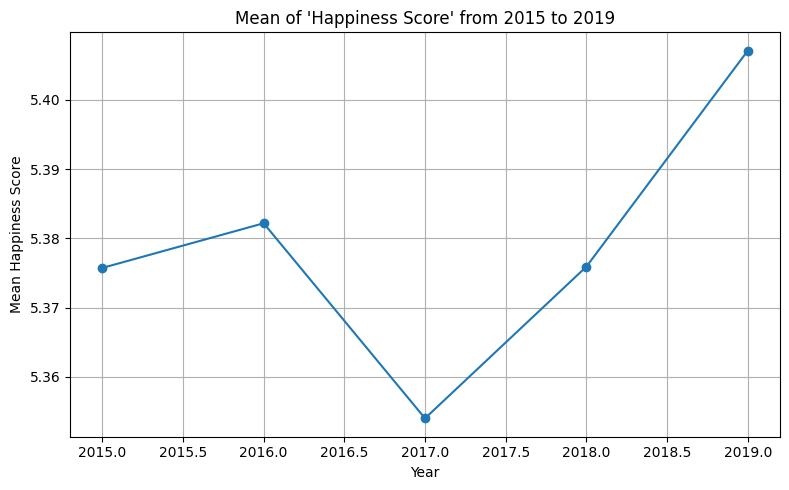

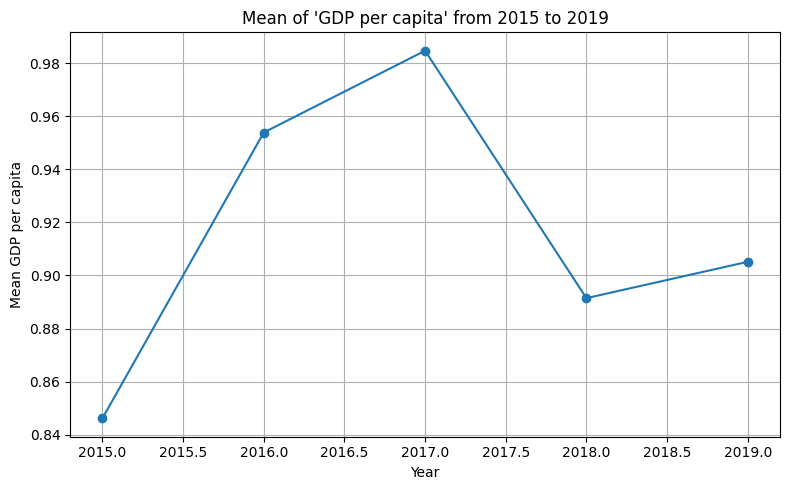

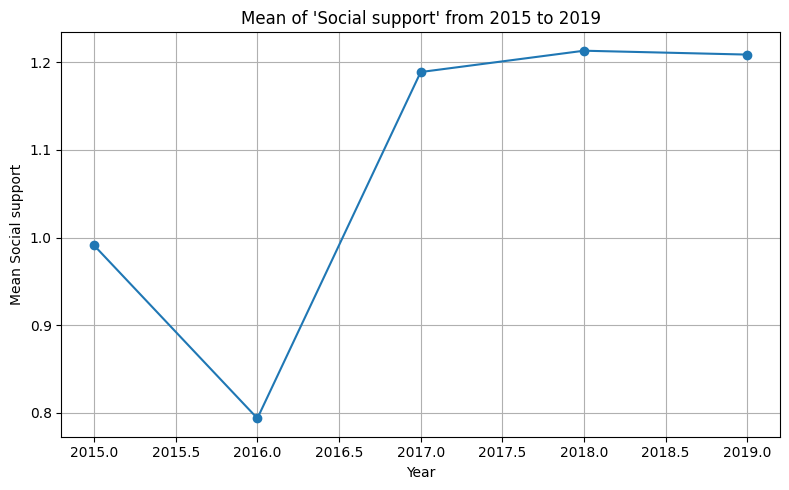

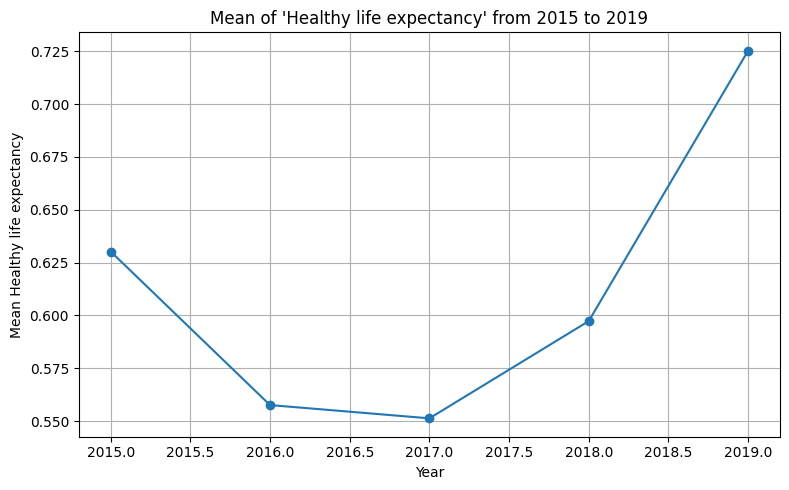

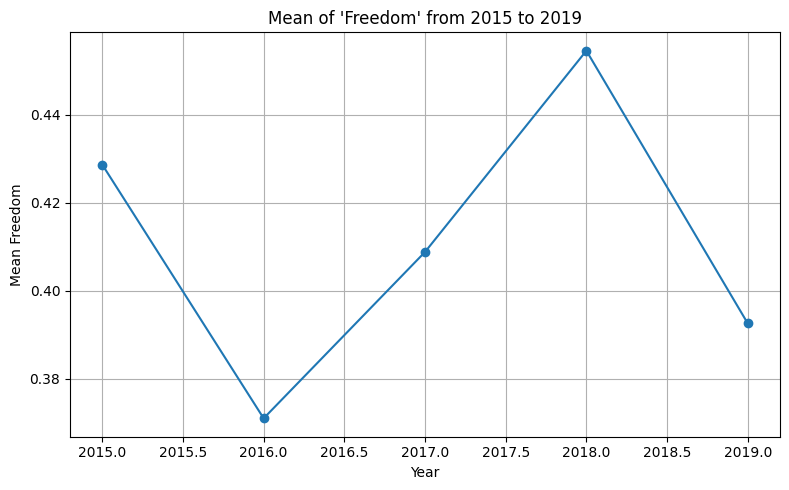

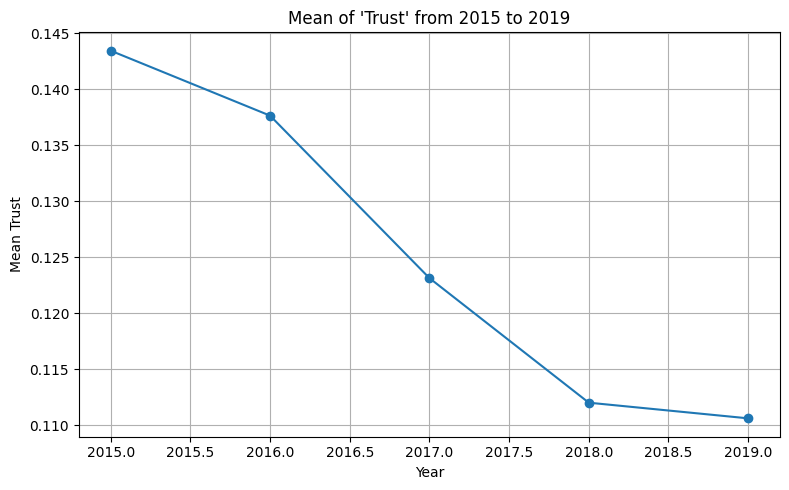

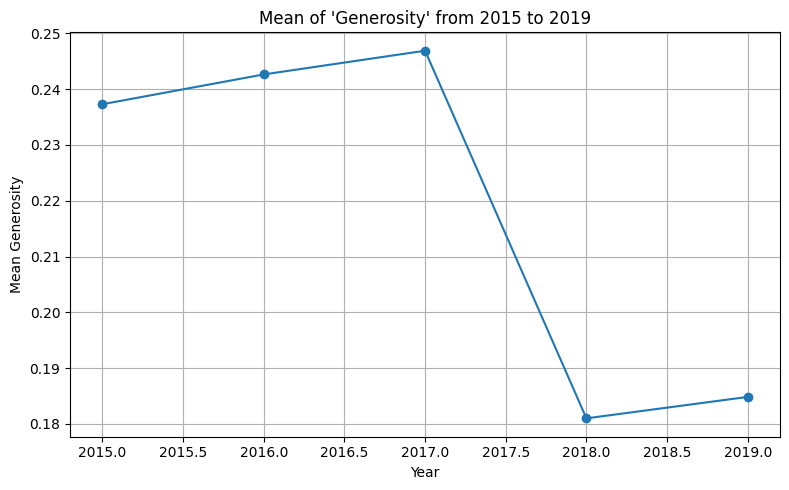

In [40]:
#Creates a standardization dict
standard_columns = {
    "Happiness Score": ["Happiness Score", "Happiness.Score", "Score"],
    "GDP per capita": ["Economy (GDP per Capita)", "Economy..GDP.per.Capita.", "GDP per capita"],
    "Social support": ["Family", "Social support"],
    "Healthy life expectancy": ["Health (Life Expectancy)", "Health..Life.Expectancy.", "Healthy life expectancy"],
    "Freedom": ["Freedom", "Freedom to make life choices"],
    "Trust": ["Trust (Government Corruption)", "Trust..Government.Corruption.", "Perceptions of corruption"],
    "Generosity": ["Generosity"]
}

dfs = {}

#Loops trough each year dfs and add a year column 
for year in range(2015, 2020):
    df = pd.read_csv(f"World_Happiness_Report_{year}.csv")
    df["year"] = year
 
#Standardizes the column names
    for std_col, variants in standard_columns.items():
        for variant in variants:
            if variant in df.columns:
                df[std_col] = df[variant]
                break

    selected_cols = ["year"] + list(standard_columns.keys())
    dfs[year] = df[selected_cols]

#Merge all the years dataframes into one
df_all_years = pd.concat(dfs.values(), ignore_index=True)

#Groups by year and calculates the mean for each variable
df_grouped = df_all_years.groupby("year").mean(numeric_only=True).reset_index()

for var in standard_columns.keys():
    plt.figure(figsize=(8, 5))
    plt.plot(df_grouped["year"], df_grouped[var], marker="o", linestyle="-")
    plt.title(f"Mean of '{var}' from 2015 to 2019")
    plt.xlabel("Year")
    plt.ylabel(f"Mean {var}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### DSQ4
### Hapiness score histograms comparison

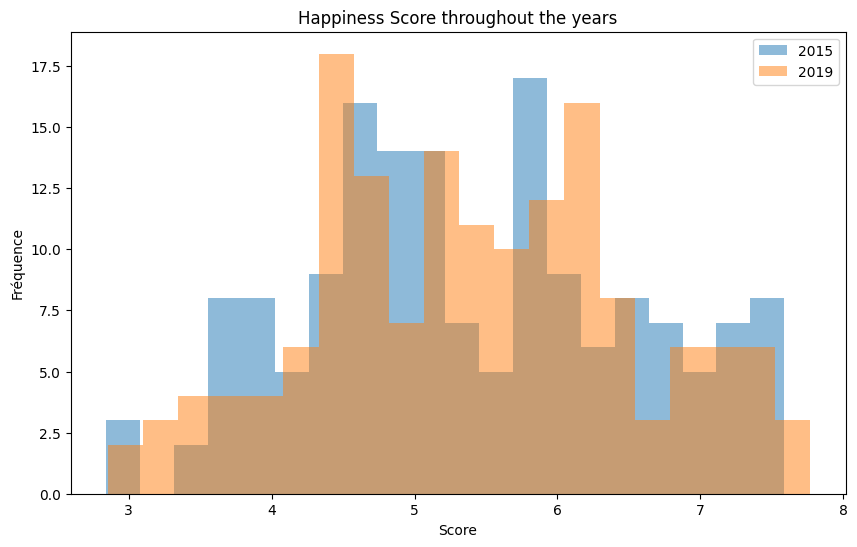

In [41]:
plt.figure(figsize=(10, 6))
plt.hist(dfs[2015]['Happiness Score'],bins = 20, alpha=0.5,  label='2015')
plt.hist(dfs[2019]['Happiness Score'],bins = 20, alpha=0.5, label='2019')
plt.title('Happiness Score throughout the years')
plt.xlabel('Score')
plt.ylabel('Fréquence')
plt.legend()
plt.show()

In 2015, the scores seem slightly more spread out, with noticeable tails in both the lower and upper ends.
In 2019, there’s a visible concentration of scores between 4.5 and 6, suggesting a slight centralizing trend — i.e., fewer very low or very high scores.

### DSQ5
### Correlations

In [42]:
#Loads the csv data
df = pd.read_csv("World_Happiness_Standardized_2015_2019.csv")

#Clean column names
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

#List the variables to check for correlation
variables = ['gdp_per_capita', 'social_support', 'healthy_life_expectancy', 'freedom', 'trust', 'generosity']

#Create an empty list
correlation_results = []

#Loop through each year and searches for the variable having the highest positive/negative correlation results and append it to the result
for year in sorted(df['year'].unique()):
    yearly_data = df[df['year'] == year]
    correlations = yearly_data.corr(numeric_only=True)['happiness_score'][variables]
    max_corr_var = correlations.idxmax()
    min_corr_var = correlations.idxmin()
    correlation_results.append({
        'year': year,
        'max_positive_corr_variable': max_corr_var,
        'max_positive_corr_value': correlations[max_corr_var],
        'max_negative_corr_variable': min_corr_var,
        'max_negative_corr_value': correlations[min_corr_var]
    })

#Convert to DataFrame and display
correlation_df = pd.DataFrame(correlation_results)
correlation_df

,year,max_positive_corr_variable,max_positive_corr_value,max_negative_corr_variable,max_negative_corr_value
0,2015,gdp_per_capita,0.780966,generosity,0.180319
1,2016,gdp_per_capita,0.790322,generosity,0.156848
2,2017,gdp_per_capita,0.812469,generosity,0.155256
3,2018,gdp_per_capita,0.802124,generosity,0.135825
4,2019,gdp_per_capita,0.793883,generosity,0.075824


### MQ1
### Linar regressions

In [43]:
#Load data
df = pd.read_csv("World_Happiness_Standardized_2015_2019.csv")
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

#Factors to test as independent variables
factors = ['gdp_per_capita', 'social_support', 'healthy_life_expectancy', 'freedom', 'trust', 'generosity']

#Stores results
results = []

#Loop over each year and each factor
for year in df['year'].unique():
    df_year = df[df['year'] == year]
    
    for factor in factors:
        #Drop rows with missing data
        data = df_year[['happiness_score', factor]].dropna()
        
        if data.empty:
            continue  #Skips if data is missing

        X = data[[factor]]
        y = data['happiness_score']

        #Fit model using Linear reg
        model = LinearRegression().fit(X, y)

        #Store the results
        results.append({
            'year': year,
            'factor': factor,
            'coefficient': model.coef_[0],
            'intercept': model.intercept_,
            'r_squared': model.score(X, y)
        })

#Convert to dataframe the results
results_df = pd.DataFrame(results)

#Display the results
results_df.sort_values(by=["year", "r_squared"], ascending=[True, False])

,year,factor,coefficient,intercept,r_squared
0,2015,gdp_per_capita,2.218227,3.498810,0.609907
1,2015,social_support,3.113424,2.290188,0.548496
2,2015,healthy_life_expectancy,3.356093,3.260525,0.524465
3,2015,freedom,4.317441,3.525214,0.322864
4,2015,trust,3.769816,4.835060,0.156182
5,2015,generosity,1.629764,4.988999,0.032515
6,2016,gdp_per_capita,2.186863,3.296180,0.624609
8,2016,healthy_life_expectancy,3.809994,3.257660,0.585813
7,2016,social_support,3.164476,2.870790,0.546493
9,2016,freedom,4.447429,3.732216,0.321292


### MQ2

In [44]:
#Find the variable with the highest R² for each year using the previous calculation
bestfactor_by_year = results_df.loc[results_df.groupby('year')['r_squared'].idxmax()]

#Display the best variable per year
print(bestfactor_by_year[['year', 'factor', 'r_squared']])

    year          factor  r_squared
0   2015  gdp_per_capita   0.609907
6   2016  gdp_per_capita   0.624609
12  2017  gdp_per_capita   0.660105
18  2018  gdp_per_capita   0.643403
24  2019  gdp_per_capita   0.630250


It seems that the variable that explains the best the hapiness score each year by itself is the gdp_per_capita one with each year having the highest R^2 scores among the variables.

### MQ3
### Multiple regressions

In [45]:
#Reuse the bellow list of variables
factors = ['gdp_per_capita', 'social_support', 'healthy_life_expectancy', 'freedom', 'trust', 'generosity']

#Store multidimensional results
multi_results = []

for year in df['year'].unique():
    df_year = df[df['year'] == year]
    
    #Drop rows with any missing values in predictors or target
    data = df_year[['happiness_score'] + factors].dropna()
    
    X = data[factors]
    y = data['happiness_score']
    
    model = LinearRegression().fit(X, y)
    
    multi_results.append({
        'year': year,
        'model': 'multidimensional',
        'r_squared': model.score(X, y)
    })

#Convert to DataFrame
multi_df = pd.DataFrame(multi_results)

#Get best univariate R² per year
best_uni_df = results_df.loc[results_df.groupby('year')['r_squared'].idxmax()]
best_uni_df = best_uni_df[['year', 'factor', 'r_squared']]
best_uni_df.rename(columns={'r_squared': 'univariate_r_squared', 'factor': 'best_univariate_factor'}, inplace=True)

#Merge to compare
comparison_df = pd.merge(multi_df, best_uni_df, on='year')

#Add improvement indicator
comparison_df['improvement'] = comparison_df['r_squared'] - comparison_df['univariate_r_squared']

#Display results
comparison_df[['year', 'best_univariate_factor', 'univariate_r_squared', 'r_squared', 'improvement']]

,year,best_univariate_factor,univariate_r_squared,r_squared,improvement
0,2015,gdp_per_capita,0.609907,0.777238,0.167331
1,2016,gdp_per_capita,0.624609,0.787512,0.162903
2,2017,gdp_per_capita,0.660105,0.812425,0.152319
3,2018,gdp_per_capita,0.643403,0.790511,0.147108
4,2019,gdp_per_capita,0.630250,0.779164,0.148914


### ========================
### Inference and hypothesis
### IHQ1

In [46]:
#Random Sample
sample = dfs[2019]['Happiness Score'].sample(30, random_state=42)

#Sample statistics (std mean and l)
sample_mean = sample.mean()
sample_std = sample.std(ddof=1)
n = len(sample)

#Calculation of the trust interval
confidence = 0.95
z_score = st.norm.ppf((1 + confidence) / 2)
margin_of_error = z_score * (sample_std / np.sqrt(n))

ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error

print(f"Trust interval at 95% : [{ci_lower:.2f}, {ci_upper:.2f}]")

Trust interval at 95% : [5.14, 5.86]


### IHQ2

In [47]:
#Known parameters 
mu_0 = 2500          #Null hypotesis
sigma = 200          #Population std
n = 50               #Sample size
x_bar = 2580         #Sample mean 
alpha = 0.05         #Significance level

#Calculation of Z
z_score = (x_bar - mu_0) / (sigma / np.sqrt(n))

#Calculation of p-value
p_value = 1 - norm.cdf(z_score)

#Critical value for Z = 0.05
z_critical = norm.ppf(1 - alpha)

#Display of the result
print(f"Z-score = {z_score:.2f}")
print(f"Z-critical (5%) = {z_critical:.2f}")
print(f"P-value = {p_value:.4f}")

if z_score > z_critical:
    print("❌ We reject the H0 : the average duaration is probably superior to 2500h.")
else:
    print("✅ We do not rejetc H0 : there isn't enough evidence that the duration will be superior to 2500h.")

Z-score = 2.83
Z-critical (5%) = 1.64
P-value = 0.0023
❌ We reject the H0 : the average duaration is probably superior to 2500h.


## ========================
## ✈️ PART B – Air Passengers
## ========================

### TSQ1

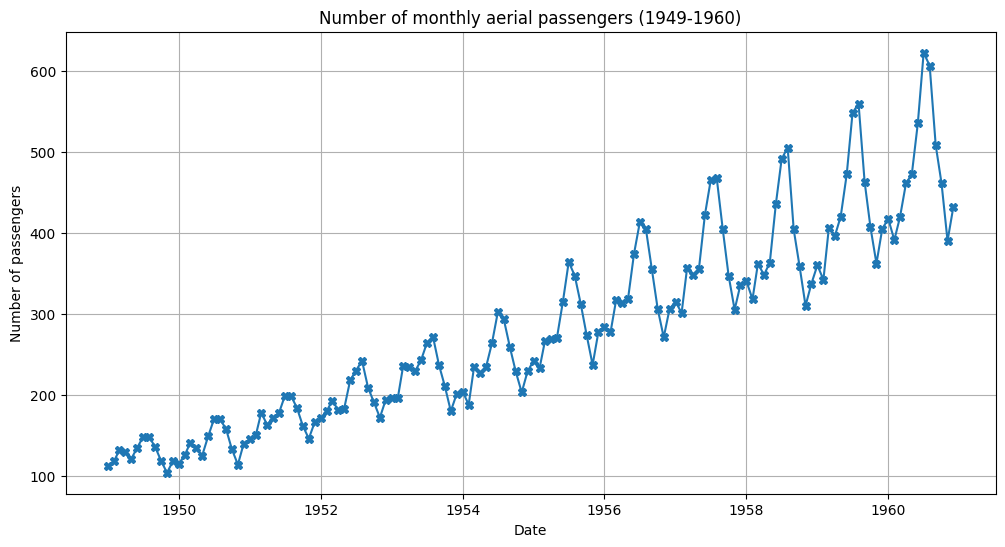

In [48]:
df2 = pd.read_csv("AirPassengers.csv")
df2["Month"] = pd.to_datetime(df2["Month"])
df2.set_index("Month", inplace=True)
plt.figure(figsize=(12, 6))
plt.plot(df2.index, df2['#Passengers'], marker='X', linestyle='-')
plt.title('Number of monthly aerial passengers (1949-1960)')
plt.xlabel('Date')
plt.ylabel('Number of passengers')
plt.grid()
plt.show()


By looking at the plot we can focus on using the multiplicative decomposition method.
### TSQ2

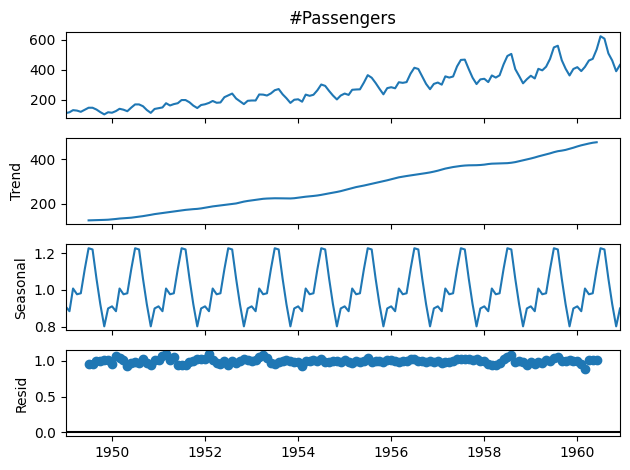

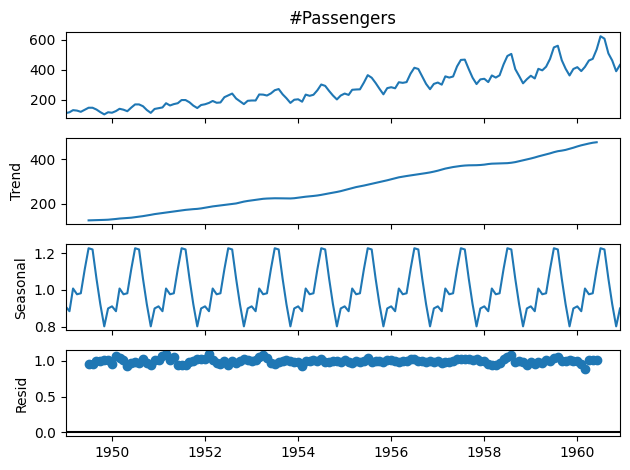

In [49]:
results2 = seasonal_decompose(df2["#Passengers"], model = "multiplicative", period=12)
results2.plot()

### TSQ3

In [50]:
#The bellow part was written using greatly the help of github copilot 
# Load the AirPassengers dataset (update path if needed)
df = pd.read_csv("AirPassengers.csv")
df['Month'] = pd.to_datetime(df['Month'])
df = df.set_index('Month').asfreq('MS')

# y being our monthly series
y = df['#Passengers']

# 1) Trend via 12-month centered moving average
trend = y.rolling(12, center=True).mean()

# 2) Seasonal indices (multiplicative), normalized
a = pd.DataFrame({'y': y, 'trend': trend}).dropna()
seasonal = (a['y'] / a['trend']).groupby(a.index.month).mean()
seasonal = seasonal / seasonal.mean()

# 3) Linear extrapolation of trend to Dec-1961
t_series = trend.dropna()
slope, intercept = np.polyfit(np.arange(len(t_series)), t_series.values, 1)
start = t_series.index[0]
target = pd.Timestamp('1961-12-01')
t_target = (target.year - start.year) * 12 + (target.month - start.month)
trend_dec61 = intercept + slope * t_target

# 4) Apply December seasonal index and print forecast
forecast_dec61 = trend_dec61 * float(seasonal.loc[12])
print("Forecast Dec 1961:", int(round(forecast_dec61)))

Forecast Dec 1961: 449
